C:\Users\Rosha\AppData\Local\Temp\ipykernel_15256\3600447552.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2', y='Model', data=df, palette=palette)
C:\Users\Rosha\AppData\Local\Temp\ipykernel_15256\3600447552.py:29: UserWarning: 
The palette list has fewer values (10) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='R2', y='Model', data=df, palette=palette)


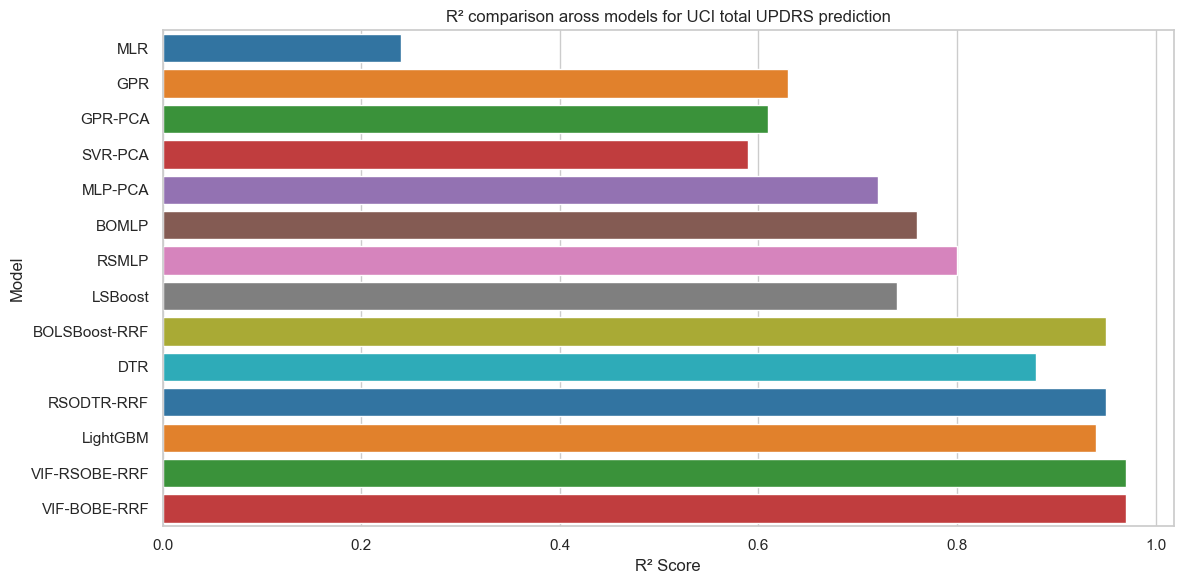

C:\Users\Rosha\AppData\Local\Temp\ipykernel_15256\3600447552.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE_Mean', y='Model', data=df, palette=palette, ci=None)
C:\Users\Rosha\AppData\Local\Temp\ipykernel_15256\3600447552.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE_Mean', y='Model', data=df, palette=palette, ci=None)
C:\Users\Rosha\AppData\Local\Temp\ipykernel_15256\3600447552.py:38: UserWarning: 
The palette list has fewer values (10) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='RMSE_Mean', y='Model', data=df, palette=palette, ci=None)


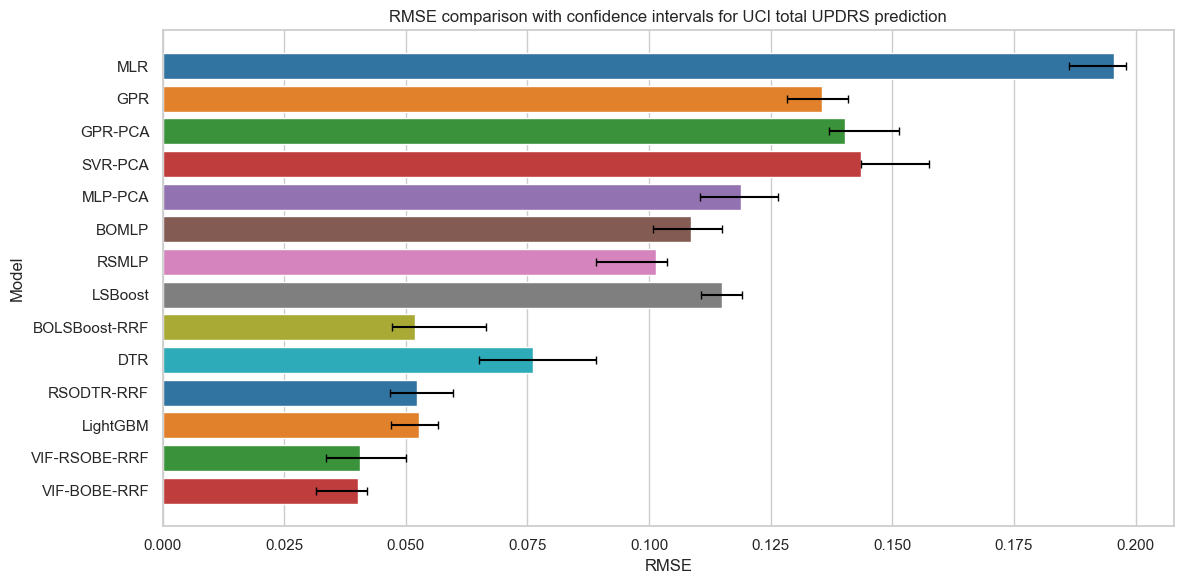

C:\Users\Rosha\AppData\Local\Temp\ipykernel_15256\3600447552.py:55: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='MAE_Mean', y='Model', data=df, palette=palette, ci=None)
C:\Users\Rosha\AppData\Local\Temp\ipykernel_15256\3600447552.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAE_Mean', y='Model', data=df, palette=palette, ci=None)
C:\Users\Rosha\AppData\Local\Temp\ipykernel_15256\3600447552.py:55: UserWarning: 
The palette list has fewer values (10) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='MAE_Mean', y='Model', data=df, palette=palette, ci=None)


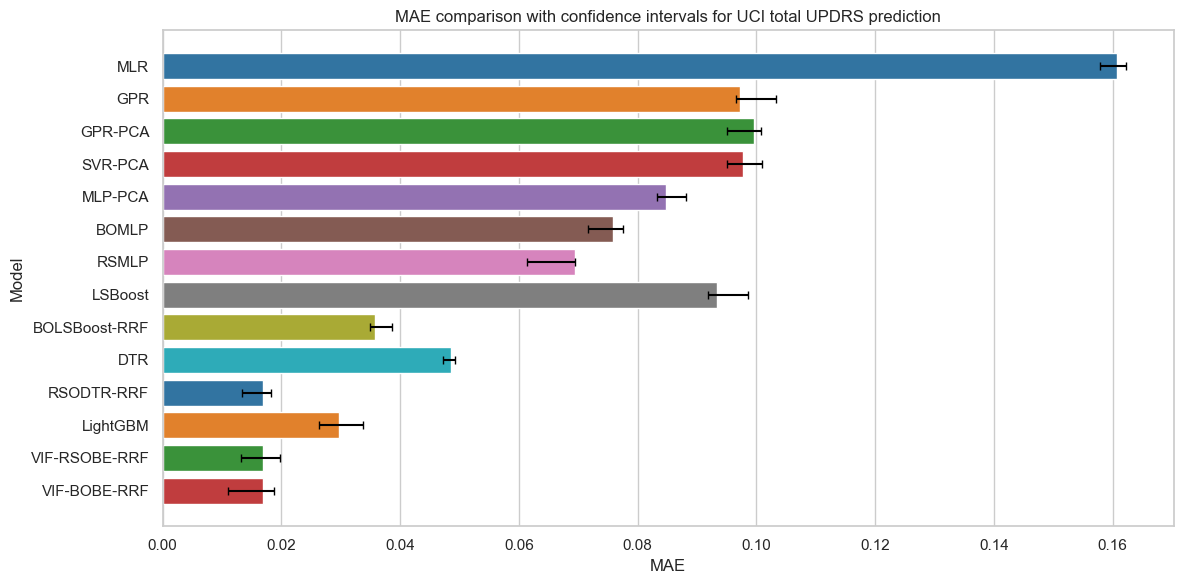

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the table
data = {
    'Model': [
        'MLR', 'GPR', 'GPR-PCA', 'SVR-PCA', 'MLP-PCA', 'BOMLP', 'RSMLP',
        'LSBoost', 'BOLSBoost-RRF', 'DTR', 'RSODTR-RRF', 'LightGBM',
        'VIF-RSOBE-RRF', 'VIF-BOBE-RRF'
    ],
    'R2': [0.24, 0.63, 0.61, 0.59, 0.72, 0.76, 0.80, 0.74, 0.95, 0.88, 0.95, 0.94, 0.97, 0.97],
    'RMSE_Mean': [0.1955, 0.1355, 0.1403, 0.1435, 0.1188, 0.1087, 0.1014, 0.1150, 0.0519, 0.0761, 0.0523, 0.0527, 0.0406, 0.0401],
    'RMSE_CI_Lower': [0.1863, 0.1283, 0.1369, 0.1435, 0.1104, 0.1009, 0.0890, 0.1107, 0.0472, 0.0650, 0.0467, 0.0470, 0.0337, 0.0315],
    'RMSE_CI_Upper': [0.1980, 0.1409, 0.1513, 0.1576, 0.1265, 0.1150, 0.1037, 0.1191, 0.0664, 0.0891, 0.0597, 0.0567, 0.0501, 0.0420],
    'MAE_Mean': [0.1607, 0.0972, 0.0996, 0.0978, 0.0847, 0.0758, 0.0694, 0.0933, 0.0357, 0.0485, 0.0170, 0.0297, 0.0169, 0.0169],
    'MAE_CI_Lower': [0.1578, 0.0966, 0.0950, 0.0951, 0.0832, 0.0716, 0.0614, 0.0918, 0.0350, 0.0472, 0.0134, 0.0263, 0.0132, 0.0111],
    'MAE_CI_Upper': [0.1622, 0.1033, 0.1008, 0.1010, 0.0881, 0.0775, 0.0658, 0.0986, 0.0387, 0.0493, 0.0182, 0.0338, 0.0198, 0.0187],
}

df = pd.DataFrame(data)

# Set plot style
sns.set(style="whitegrid")
palette = sns.color_palette("tab10")

# Plot 1: R² Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='R2', y='Model', data=df, palette=palette)
plt.title('R² comparison aross models for UCI total UPDRS prediction')
plt.xlabel('R² Score')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

# Plot 2: RMSE Comparison with CI
plt.figure(figsize=(12, 6))
sns.barplot(x='RMSE_Mean', y='Model', data=df, palette=palette, ci=None)

# Compute safe error values
rmse_lower_err = (df['RMSE_Mean'] - df['RMSE_CI_Lower']).clip(lower=0)
rmse_upper_err = (df['RMSE_CI_Upper'] - df['RMSE_Mean']).clip(lower=0)

plt.errorbar(df['RMSE_Mean'], df['Model'],
             xerr=[rmse_lower_err, rmse_upper_err],
             fmt='none', c='black', capsize=3)
plt.title('RMSE comparison with confidence intervals for UCI total UPDRS prediction')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

# Plot 3: MAE Comparison with CI
plt.figure(figsize=(12, 6))
sns.barplot(x='MAE_Mean', y='Model', data=df, palette=palette, ci=None)

# Compute safe error values
mae_lower_err = (df['MAE_Mean'] - df['MAE_CI_Lower']).clip(lower=0)
mae_upper_err = (df['MAE_CI_Upper'] - df['MAE_Mean']).clip(lower=0)

plt.errorbar(df['MAE_Mean'], df['Model'],
             xerr=[mae_lower_err, mae_upper_err],
             fmt='none', c='black', capsize=3)
plt.title('MAE comparison with confidence intervals for UCI total UPDRS prediction')
plt.xlabel('MAE')
plt.ylabel('Model')
plt.tight_layout()
plt.show()


C:\Users\Rosha\AppData\Local\Temp\ipykernel_15256\2786744756.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2', y='Model', data=df, palette=palette)
C:\Users\Rosha\AppData\Local\Temp\ipykernel_15256\2786744756.py:29: UserWarning: 
The palette list has fewer values (10) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='R2', y='Model', data=df, palette=palette)


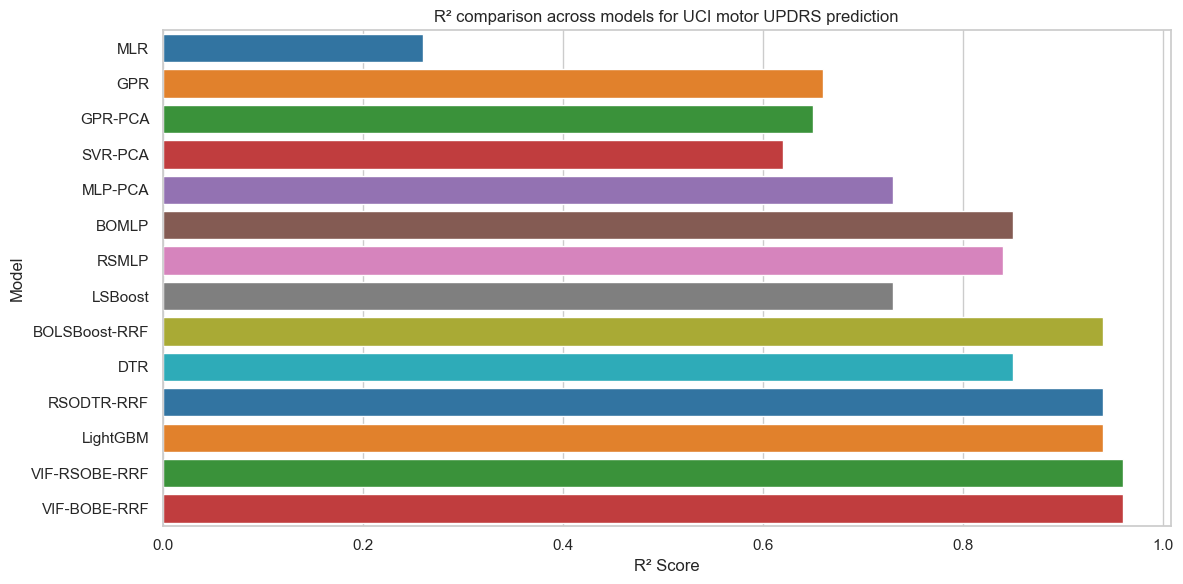

C:\Users\Rosha\AppData\Local\Temp\ipykernel_15256\2786744756.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RMSE_Mean', y='Model', data=df, palette=palette, ci=None)
C:\Users\Rosha\AppData\Local\Temp\ipykernel_15256\2786744756.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE_Mean', y='Model', data=df, palette=palette, ci=None)
C:\Users\Rosha\AppData\Local\Temp\ipykernel_15256\2786744756.py:38: UserWarning: 
The palette list has fewer values (10) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='RMSE_Mean', y='Model', data=df, palette=palette, ci=None)


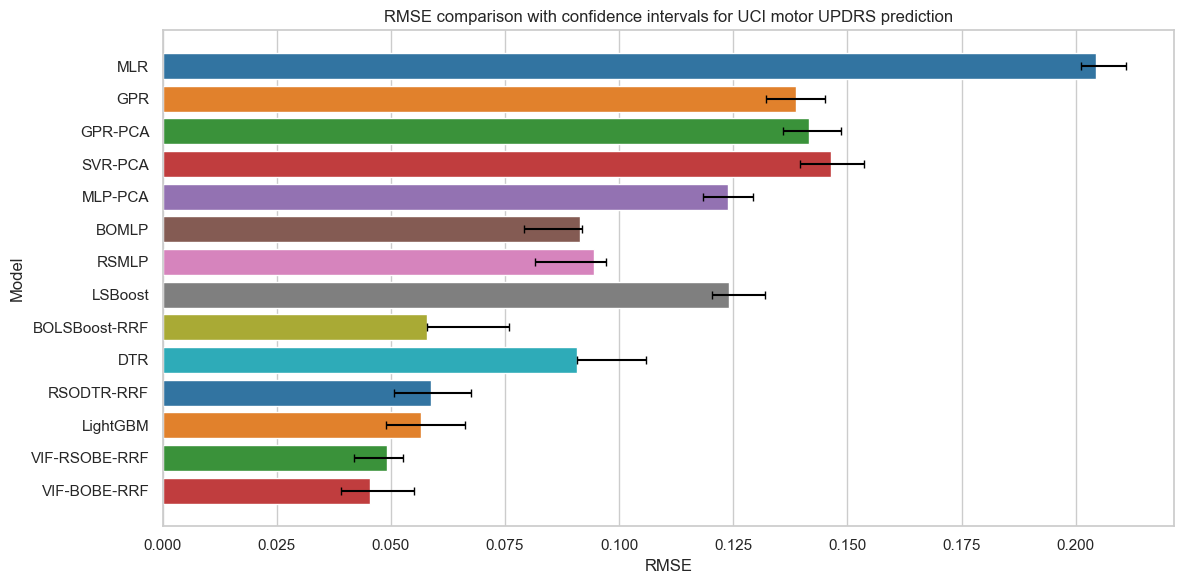

C:\Users\Rosha\AppData\Local\Temp\ipykernel_15256\2786744756.py:55: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='MAE_Mean', y='Model', data=df, palette=palette, ci=None)
C:\Users\Rosha\AppData\Local\Temp\ipykernel_15256\2786744756.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAE_Mean', y='Model', data=df, palette=palette, ci=None)
C:\Users\Rosha\AppData\Local\Temp\ipykernel_15256\2786744756.py:55: UserWarning: 
The palette list has fewer values (10) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='MAE_Mean', y='Model', data=df, palette=palette, ci=None)


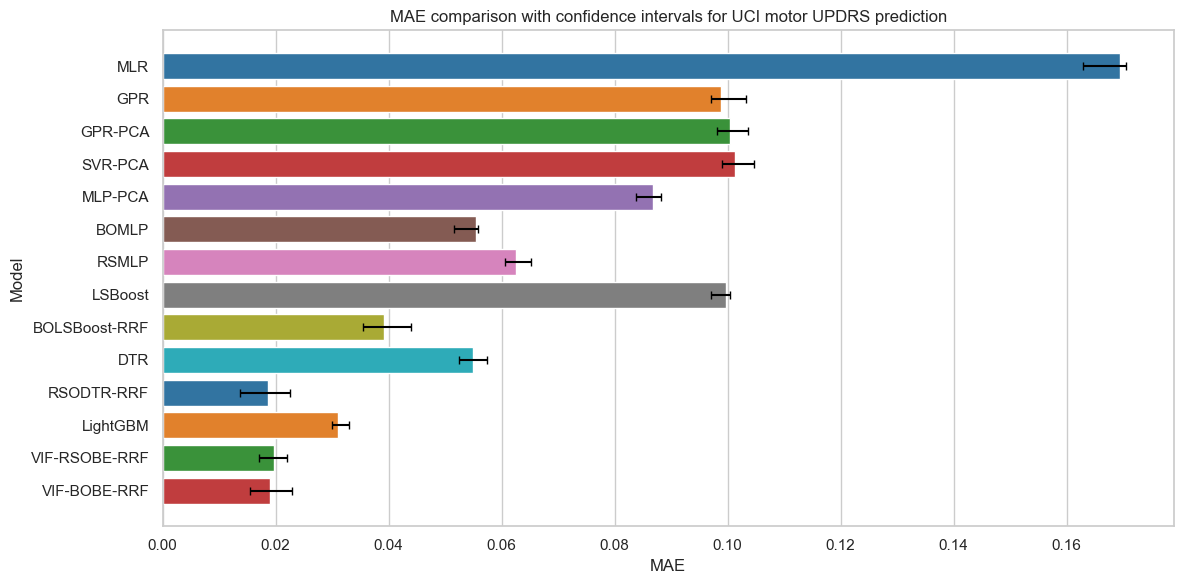

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Updated data from the LaTeX table
data = {
    'Model': [
        'MLR', 'GPR', 'GPR-PCA', 'SVR-PCA', 'MLP-PCA', 'BOMLP', 'RSMLP',
        'LSBoost', 'BOLSBoost-RRF', 'DTR', 'RSODTR-RRF', 'LightGBM',
        'VIF-RSOBE-RRF', 'VIF-BOBE-RRF'
    ],
    'R2': [0.26, 0.66, 0.65, 0.62, 0.73, 0.85, 0.84, 0.73, 0.94, 0.85, 0.94, 0.94, 0.96, 0.96],
    'RMSE_Mean': [0.2044, 0.1387, 0.1416, 0.1465, 0.1238, 0.0914, 0.0944, 0.1240, 0.0579, 0.0908, 0.0589, 0.0567, 0.0492, 0.0454],
    'RMSE_CI_Lower': [0.20122, 0.13207, 0.13578, 0.13965, 0.11827, 0.07913, 0.08152, 0.12024, 0.05896, 0.09121, 0.05077, 0.04899, 0.04195, 0.03901],
    'RMSE_CI_Upper': [0.21096, 0.14498, 0.14854, 0.15359, 0.12941, 0.09179, 0.09707, 0.13191, 0.07590, 0.10598, 0.06766, 0.06626, 0.05273, 0.05497],
    'MAE_Mean': [0.1694, 0.0989, 0.1005, 0.1014, 0.0868, 0.0555, 0.0626, 0.0997, 0.0392, 0.0549, 0.0187, 0.0311, 0.0198, 0.0190],
    'MAE_CI_Lower': [0.1630, 0.0971, 0.0981, 0.0991, 0.0838, 0.0516, 0.0606, 0.0970, 0.0354, 0.0525, 0.0138, 0.0300, 0.0170, 0.0155],
    'MAE_CI_Upper': [0.1705, 0.1033, 0.1036, 0.1047, 0.0883, 0.0559, 0.0652, 0.1004, 0.0439, 0.0575, 0.0226, 0.0330, 0.0221, 0.0230],
}

df = pd.DataFrame(data)

# Set plot style
sns.set(style="whitegrid")
palette = sns.color_palette("tab10")

# Plot 1: R² Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='R2', y='Model', data=df, palette=palette)
plt.title('R² comparison across models for UCI motor UPDRS prediction')
plt.xlabel('R² Score')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

# Plot 2: RMSE Comparison with CI
plt.figure(figsize=(12, 6))
sns.barplot(x='RMSE_Mean', y='Model', data=df, palette=palette, ci=None)

# Compute safe error values
rmse_lower_err = (df['RMSE_Mean'] - df['RMSE_CI_Lower']).clip(lower=0)
rmse_upper_err = (df['RMSE_CI_Upper'] - df['RMSE_Mean']).clip(lower=0)

plt.errorbar(df['RMSE_Mean'], df['Model'],
             xerr=[rmse_lower_err, rmse_upper_err],
             fmt='none', c='black', capsize=3)
plt.title('RMSE comparison with confidence intervals for UCI motor UPDRS prediction')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

# Plot 3: MAE Comparison with CI
plt.figure(figsize=(12, 6))
sns.barplot(x='MAE_Mean', y='Model', data=df, palette=palette, ci=None)

# Compute safe error values
mae_lower_err = (df['MAE_Mean'] - df['MAE_CI_Lower']).clip(lower=0)
mae_upper_err = (df['MAE_CI_Upper'] - df['MAE_Mean']).clip(lower=0)

plt.errorbar(df['MAE_Mean'], df['Model'],
             xerr=[mae_lower_err, mae_upper_err],
             fmt='none', c='black', capsize=3)
plt.title('MAE comparison with confidence intervals for UCI motor UPDRS prediction')
plt.xlabel('MAE')
plt.ylabel('Model')
plt.tight_layout()
plt.show()
